# Домашняя работа по курсу:   
# "Математическое моделирование биологических процессов"    
# Выполнил студент гр. БМТ1-12 М    
# Колокольников Георгий

## Линейная аппроксимация по МНК

#### Импортируем библиотеки

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Зададим линейную зависимость: y = mx + c, где m=0.5 и c=2

In [17]:
x = np.arange(50)
y = x * 0.5 + 2
y += np.random.randn(50) * 5    # добавим шум

# Перепишем линейное уравнение в матричном виде: y = Ap, где A=[[x, 1]] и p=[[m], [c]]
A = np.c_[x, np.ones(50)]

#### Решение для P по МНК дает угол наклон и коэффициент смещения аппроксимирующей кривой

In [18]:
p, residuals, rank, svals = np.linalg.lstsq(A, y)

#### Построим набор исходных точек и аппроксимирующую прямую

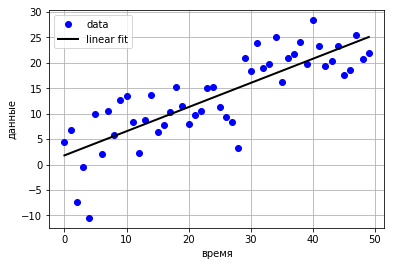

In [19]:
plt.plot(x, y, 'ob', label='data')
plt.plot(x, A.dot(p), '-k', lw=2, label='linear fit')
plt.legend()
plt.grid()
plt.xlabel('время')
plt.ylabel('данные')
plt.show()

## Полиномиальная аппроксимация 2й степени по МНК

#### Импортируем библиотеки

In [20]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#### Зададим набор точек

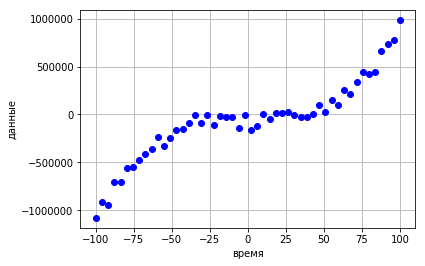

In [21]:
t = np.linspace(-100,100,50)
parabola = t**3 - 3*t**2 + 5
noise = np.random.normal(-50000,50000,50)
y = parabola + noise

plt.plot(t, y, 'ob', label='data')
plt.grid()
plt.xlabel('время')
plt.ylabel('данные')
plt.show()

#### Зададим матрицу, описывающую полином и используем МНК для определения коэффициентов и построим полином

In [22]:
degree = 2
# form the Vandermonde matrix
A = np.vander(t, degree)
 
# Найдем x который минимизирует норму Ax-y
(coeffs, residuals, rank, sing_vals) = np.linalg.lstsq(A, y)
 
# Построим полином по заданным коэффициентам
f = np.poly1d(coeffs)

#### Построим полученный полином 2й степени

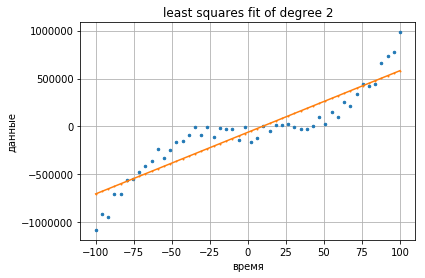

In [23]:
y_est = f(t)
 
plt.plot(t, y, '.', label = 'original data', markersize=5)
plt.plot(t, y_est, 'o-', label = 'estimate', markersize=1)
plt.title('least squares fit of degree '+str(degree))
plt.grid()
plt.xlabel('время')
plt.ylabel('данные')
plt.show()

#### Очевидно, что аппроксимация полиномом 2й степени не подходит

## Полиномиальная аппроксимация 5й степени по МНК

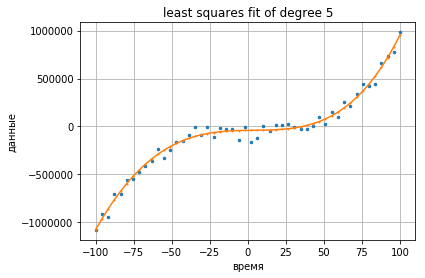

In [24]:
degree = 5

# form the Vandermonde matrix
A = np.vander(t, degree)
 
# Найдем x, который минимизирует норму Ax-y
(coeffs, residuals, rank, sing_vals) = np.linalg.lstsq(A, y)
 
# Построим полином по коэффициентам
f = np.poly1d(coeffs)

# Построим графики
y_est = f(t)
 
# create plot
plt.plot(t, y, '.', label = 'original data', markersize=5)
plt.plot(t, y_est, 'o-', label = 'estimate', markersize=1)
plt.grid()
plt.xlabel('время')
plt.ylabel('данные')
plt.title('least squares fit of degree '+str(degree))
plt.show()

#### Аппроксимация соответствует исходным данным наилучшим образом (по сравнению  со степенями 2 и 10)

## Полиномиальная аппроксимация 10й степени по МНК

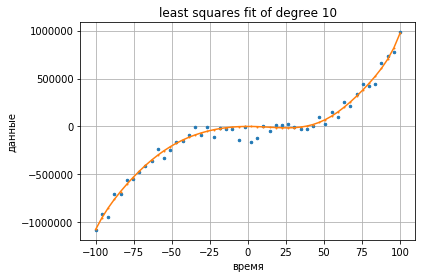

In [25]:
degree = 10

# form the Vandermonde matrix
A = np.vander(t, degree)
 
# Определеим x, который минимизурует норму Ax-y
(coeffs, residuals, rank, sing_vals) = np.linalg.lstsq(A, y)
 
# Построим полином по коэффициентам
f = np.poly1d(coeffs)

# Построим график
y_est = f(t)
 
# create plot
plt.plot(t, y, '.', label = 'original data', markersize=5)
plt.plot(t, y_est, 'o-', label = 'estimate', markersize=1)
plt.grid()
plt.xlabel('время')
plt.ylabel('данные')
plt.title('least squares fit of degree '+str(degree))
plt.show()

#### При аппроксимации полиномом степени 10 наблюдается overfitting (полином "облизывает" точки)

## Аппроксимация с помощью метода опорных векторов и машинного обучения

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

#### Импорт библиотеки машинного обучения

In [26]:
from sklearn.svm import SVR

#### Зададим исходные данные

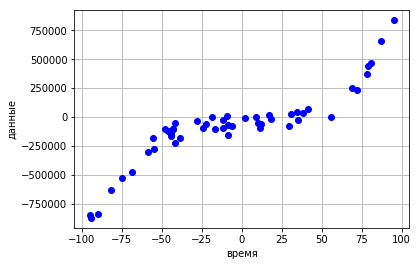

In [27]:
np.random.seed(3)
n = 50
x = np.random.uniform(-100, 100, size = n)
y = x**3 - 3*x**2 + 5 + noise
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

# Построим исходные данные
plt.plot(x,y, 'ob')
plt.grid()
plt.xlabel('время')
plt.ylabel('данные')
plt.show()

#### Выберем регрессионную модель, основанную на методе опорных векторов. В качестве ядра алгоритма выберем полиномиальную функцию.

In [28]:
clf = SVR(kernel='poly', C=10, degree=3, verbose=True)

#### Обучим модель на тренировочной выборке X и соответствующих ей метках y

In [29]:
a = clf.fit(X, y)

[LibSVM]

#### "Предскажем" результаты <=> построим аппроксимирующую функцию

In [33]:
x_input = np.linspace(-100, 100, 160) # Зададим ось x
pred_x = np.reshape(x_input, [160, 1]) # Выполним необходимые преобразования размерности
pred_y = clf.predict(pred_x) # Определим выходные значения модели для входных значений x_input

#### Построим график

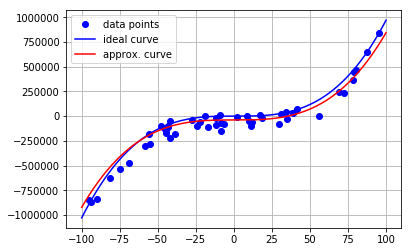

In [32]:
fig = plt.figure() 
plt.plot(x,y, 'ob', label='data points')
plt.plot(x_input, x_input**3 - 3*x_input**2 + 5, color = 'b', label='ideal curve') # График исходной функции
plt.plot(pred_x, pred_y, '-', color = 'r', label='approx. curve') # График аппроксимирующей функции
plt.legend()
plt.grid()
plt.show()

## Аппроксимация с помощью многослойного перцептрона

Согласно теореме Цыбенко - универсальная теорема аппроксимации — теорема, которая утверждает, что искусственная нейронная сеть прямой связи (англ. feed-forward) с одним скрытым слоем может аппроксимировать любую непрерывную функцию многих переменных с любой точностью.

#### Импорт из библиотеки машинного обучения многослойного перцептрона

In [35]:
from sklearn.neural_network import MLPRegressor

#### Исходные данные остаются прежними     
#### Обучим однослойную нейронную сеть (один скрытый слой). Параметр L2-регуляризации выберем равным 0.001; количество нейронов в скрытом слое - 10; количество итераций обучения - 100000 с адаптивным изменением скорости обучения; в качестве функции активации выбран ReLU.

In [115]:
clf = MLPRegressor(alpha=0.001, hidden_layer_sizes = (10,), max_iter = 100000, 
                 activation = 'relu', verbose = False, learning_rate = 'adaptive', learning_rate_init = 0.01)
a = clf.fit(X, y)

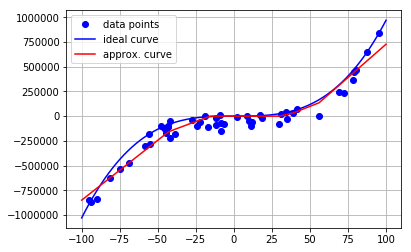

In [116]:
pred_x = np.reshape(x_input, [160, 1]) # Изменим размерность
pred_y = clf.predict(pred_x) # Предскажем точки


# Построим графики
plt.plot(x,y, 'ob', label='data points')
plt.plot(x_input, x_input**3 - 3*x_input**2 + 5, color = 'b', label='ideal curve') # График исходной функции
plt.plot(pred_x, pred_y, '-', color = 'r', label='approx. curve') # График аппроксимирующей функции
plt.legend()
plt.grid()
plt.show()